In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
df = pd.read_csv('/home/shrinidhi/Desktop/sem6/Computer Graphics/test.csv', error_bad_lines=False)

b'Skipping line 3: expected 50325 fields, saw 50440\nSkipping line 4: expected 50325 fields, saw 50625\nSkipping line 5: expected 50325 fields, saw 50540\nSkipping line 6: expected 50325 fields, saw 50347\nSkipping line 7: expected 50325 fields, saw 50490\nSkipping line 8: expected 50325 fields, saw 50600\nSkipping line 9: expected 50325 fields, saw 50490\nSkipping line 10: expected 50325 fields, saw 50400\nSkipping line 11: expected 50325 fields, saw 50400\nSkipping line 12: expected 50325 fields, saw 50463\nSkipping line 13: expected 50325 fields, saw 50531\nSkipping line 14: expected 50325 fields, saw 50625\nSkipping line 15: expected 50325 fields, saw 50505\nSkipping line 17: expected 50325 fields, saw 50344\nSkipping line 18: expected 50325 fields, saw 50451\nSkipping line 19: expected 50325 fields, saw 50490\nSkipping line 24: expected 50325 fields, saw 50505\nSkipping line 26: expected 50325 fields, saw 50400\nSkipping line 27: expected 50325 fields, saw 50625\nSkipping line 28:

In [ ]:
df.head(5)

In [ ]:
df2 = pd.read_csv('/home/shrinidhi/Desktop/sem6/Computer Graphics/train.csv', error_bad_lines=False)

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

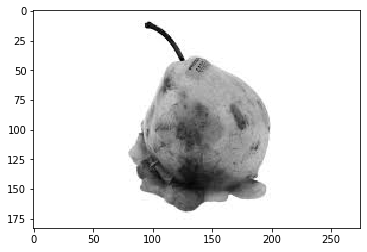

In [4]:
DATADIR = '/home/shrinidhi/Desktop/sem6/Waste-Classification-App/Model/TRAIN'
CATEGORIES = ['O', 'R']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to O or R dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(183, 275)


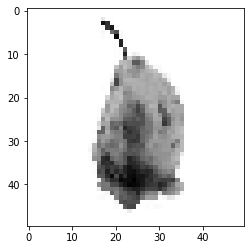

In [4]:
IMG_SIZE = 50                                 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to O or R dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(len(training_data))

22564


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
1
0
1
0
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1: because it is grayscale

In [11]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard

/home/shrinidhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shrinidhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shrinidhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shrinidhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [14]:
NAME = "O-vs-R-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.2, callbacks=[tensorboard])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 18051 samples, validate on 4513 samples
Epoch 1/5
18051/18051 [==============================] - 365s 20ms/sample - loss: 0.6087 - acc: 0.6779 - val_loss: 0.5706 - val_acc: 0.7197
Epoch 2/5
18051/18051 [==============================] - 332s 18ms/sample - loss: 0.5521 - acc: 0.7295 - val_loss: 0.6363 - val_acc: 0.6885
Epoch 3/5
18051/18051 [==============================] - 330s 18ms/sample - loss: 0.5301 - acc: 0.7412 - val_loss: 0.5234 - val_acc: 0.7567
Epoch 4/5
18051/18051 [==============================] - 332s 18ms/sample - loss: 0.5128 - acc: 0.7541 - val_loss: 0.5235 - val_acc: 0.7498
Epoch 5/5
18051/18051 [==============================] - 326s 18ms/sample - loss: 0.4921 - acc: 0.7706 - val_loss: 0.6137 - val_acc: 0.6873
